In [31]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import plot_tools
import marbl_diag

In [32]:
category_name = 'timemean_surface'
category_spec = marbl_diag.collections[my_category]
ds = marbl_diag.open_transformed_dataset(**category_spec)
ds

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 12, transport_comp: 5, transport_reg: 2, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_top               (z_w_top) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 3000.0 4000.0 ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.4882 -78.9529 -78.4187 ...
  * moc_z                 (moc_z) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * time                  (time) float64 396.0 424.0 455.0 485.0 516.0 546.0 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    z_t                   float64 500.0
    z_t_150m              float64 500.0
    moc_components        (moc_comp) |S384 'Eulerian Mean' ...
    transport_components  (transport_comp) |S384 'Total' ...
    transp

97.596
0.0


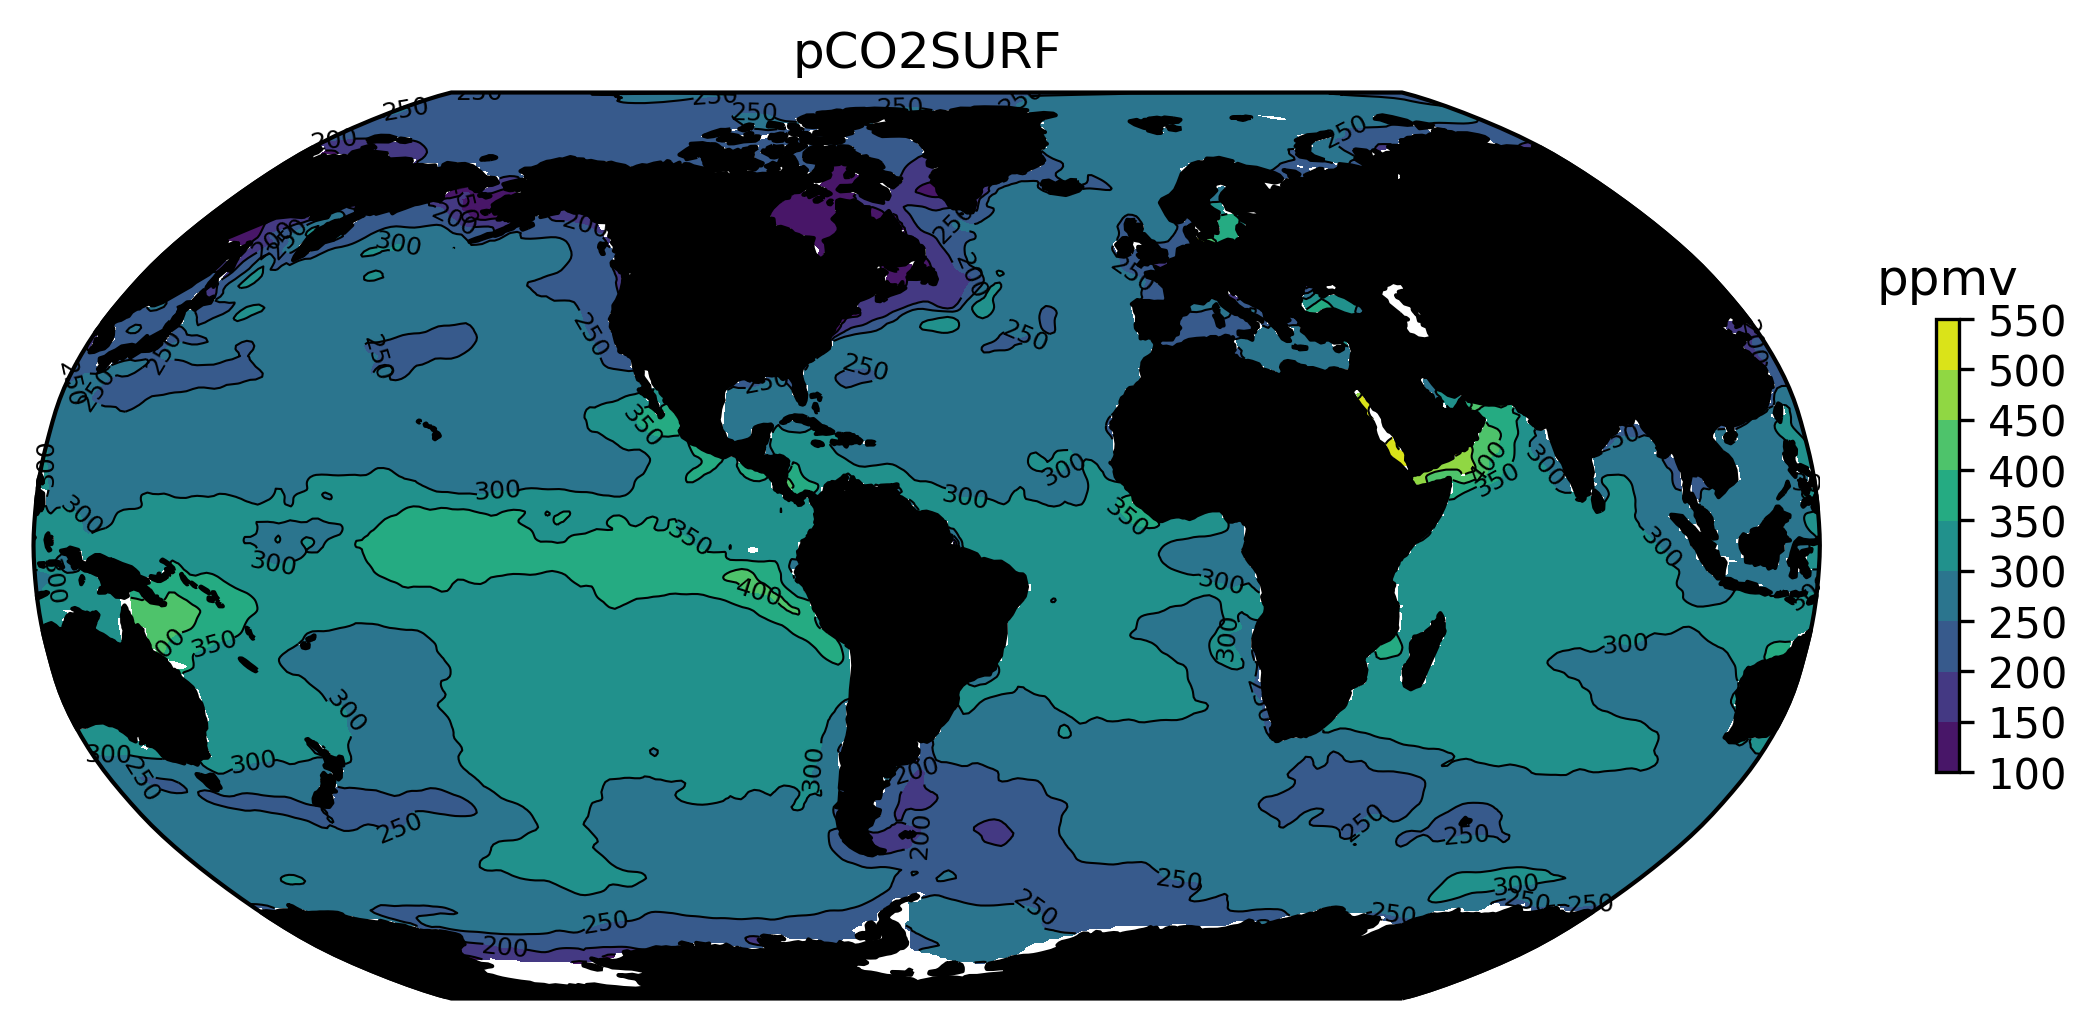

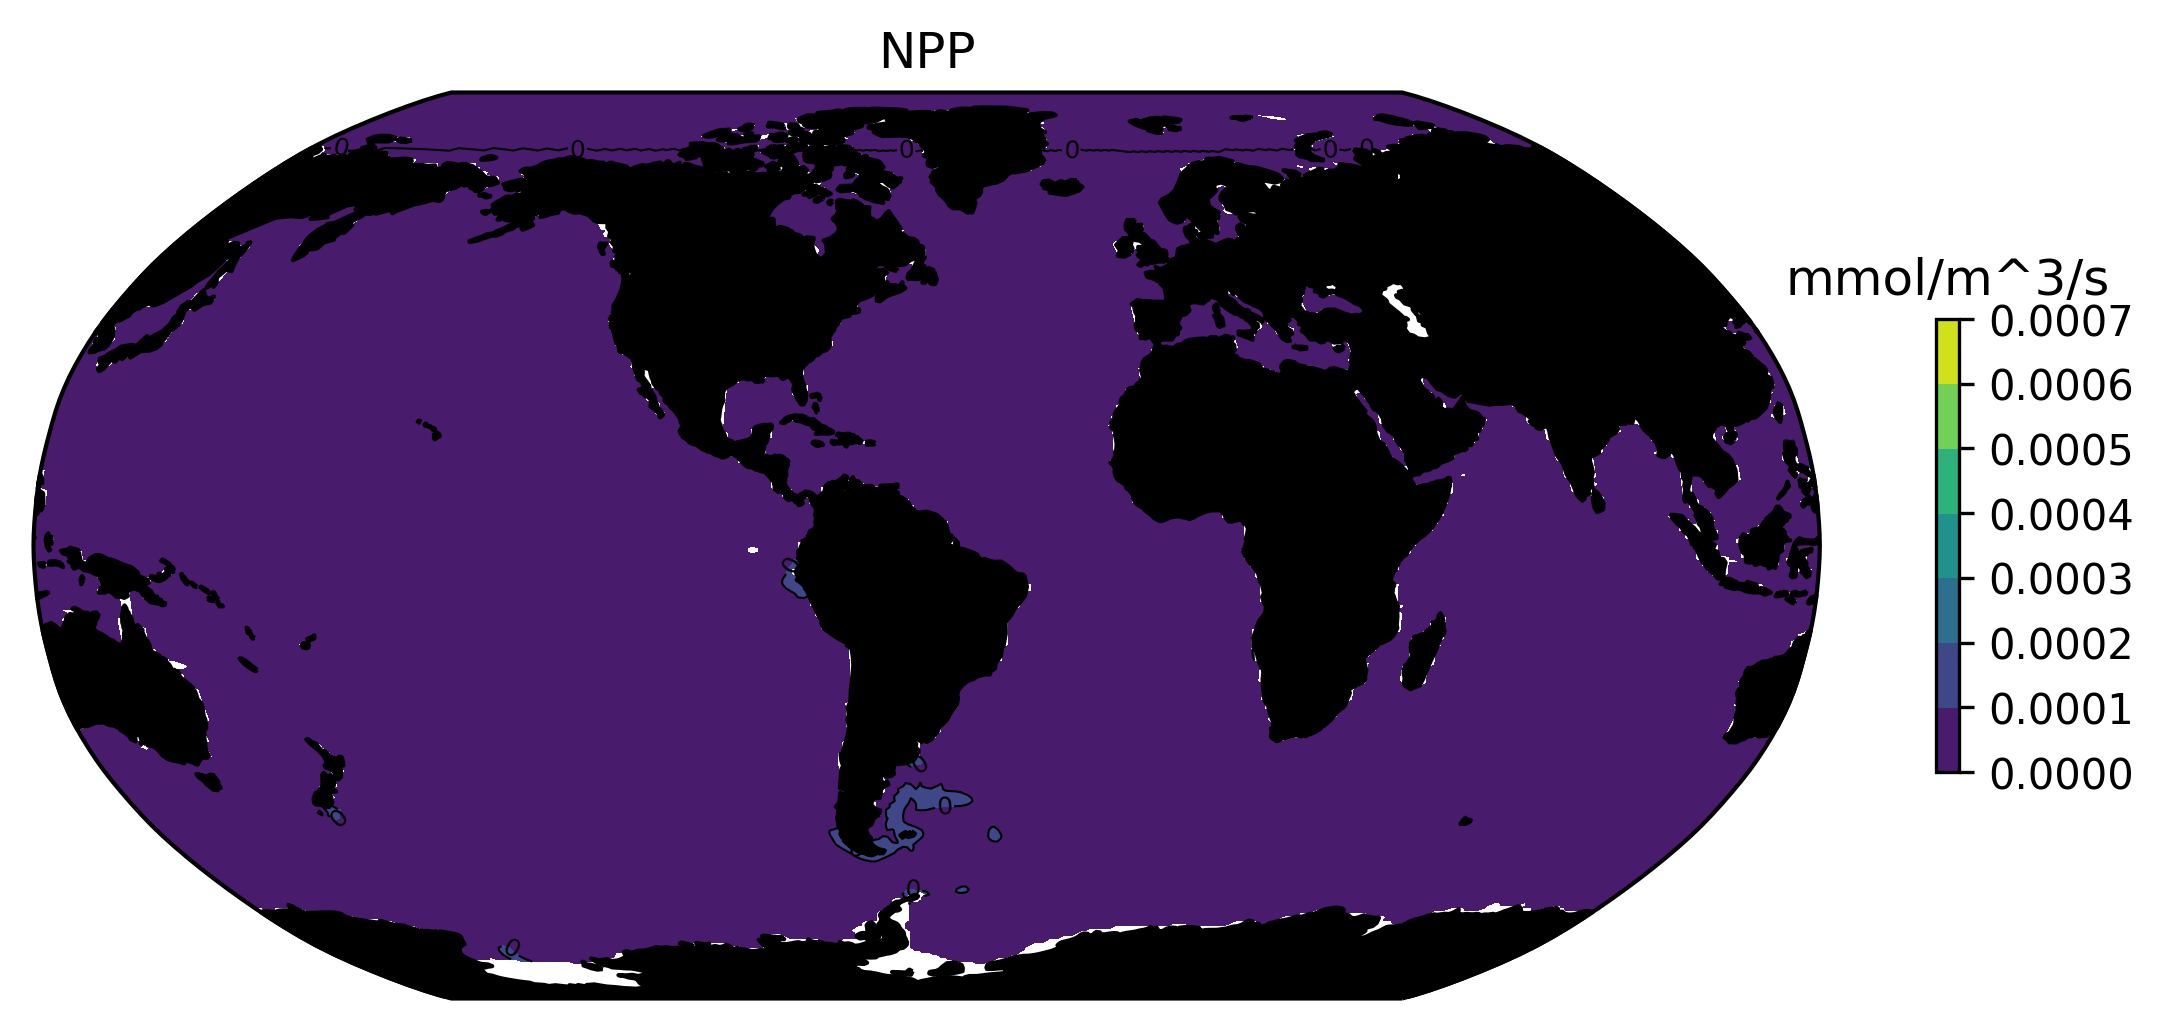

In [33]:
obj = {}
for v in category_spec['variables']:
    varname = v
    if ':' in v:
        varname = v.split(':')[0]
    units = ds[varname].attrs['units']
    lon = ds.TLONG.values
    lat = ds.TLAT.values
    field = ds[varname].values[0,:,:]
    lon,lat,field = plot_tools.adjust_pop_grid(lon,lat,field)
    print np.nanmin(field)
    contour_specs = {'levels':plot_tools.nice_levels(np.nanmin(field), 
                                          np.nanmax(field),10)} #,'cmap':cmocean.cm.balance}
    
    fig=plt.figure(figsize=(10, 4),dpi=300)
    gs = gridspec.GridSpec(1,1)
    obj[varname] = plot_tools.canvas_map_contour_overlay(lon,lat,field,
                                                    contour_specs,
                                                    units = units,
                                                    fig=fig,
                                                    gridspec=gs,
                                                    row=0,col=0)
    obj[varname]['ax'].set_title(varname)
    